In [1]:
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt 

In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

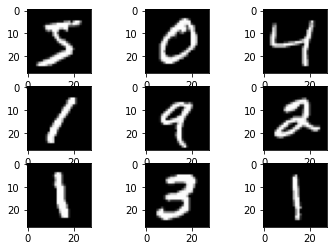

In [7]:
for i in range (9):
  plt.subplot(330 +i +1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
x_train = x_train.reshape(60000,784) 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train =np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [9]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

Epoch 1/500
375/375 [==============================] - 5s 4ms/step - loss: 0.2755 - accuracy: 0.9143 - val_loss: 0.1311 - val_accuracy: 0.9607
Epoch 2/500
375/375 [==============================] - 1s 4ms/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.0908 - val_accuracy: 0.9712
Epoch 3/500
375/375 [==============================] - 1s 4ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.0890 - val_accuracy: 0.9737
Epoch 4/500
375/375 [==============================] - 1s 4ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0934 - val_accuracy: 0.9750
Epoch 5/500
375/375 [==============================] - 1s 4ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0886 - val_accuracy: 0.9782
Epoch 6/500
375/375 [==============================] - 2s 4ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.1008 - val_accuracy: 0.9749
Epoch 7/500
375/375 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0873 - val_accuracy: 0.9797

Test loss:  0.2590281069278717
Test accuracy:  0.9818999767303467


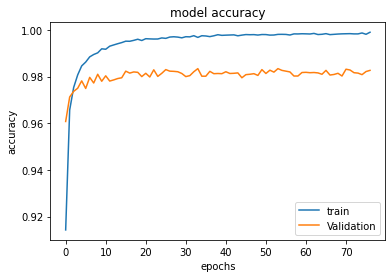

In [11]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()